In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


def readDF(path = 'Task_data_EURUSD.csv', nRows = None):
    df = pd.read_csv(path, delimiter = ';')
    return df.iloc[0:nRows]

        
def write(df, name = 'Данные до интерполяции'):
    txt = open(name + '.txt', 'w')
    txt.write(df.to_string())    

        
def setForInterp(a = -5, b = 5, chebyshev = False, n = 10):
    f = lambda x: -np.sinc(1.5 * x)
    
    if chebyshev == True:
        x = [((a + b) / 2) + ((b - a) * np.cos((2 * i - 1) * np.pi / (2 * n)) / 2) \
            for i in range (1, n + 1)]
        y = np.zeros(len(x))
        for i in range(len(x)):
            y[i] = f(x[i])
    else:
        x = np.linspace(a, b, n)
        y = np.array(f(x))
    
    df = pd.DataFrame({'x': x,\
                       'y': y})
    return df


def polynominalSet(set = setForInterp(n = 10), n = 20):
    '''Возвращет набор данных, интерполированных полиномом Лагранжа.'''
    x = set['x']
    y = set['y']
    a = min(x)
    b = max(x)
    t = np.linspace(a, b, n)
    
    def lagrangianPol(x, y, t):
        '''Интерполяционный полином Лагранжа.'''
        p = 0
        for i in range(len(x)):
            li = 1
            for j in range(len(x)):
                if j != i:
                    li *= (t - x[j]) / (x[i] - x[j])
            p += y[i] * li 
        return p
    
    
    df = pd.DataFrame({'x': t,
                       'y': lagrangianPol(x, y, t)})
    return df
        
    
def draw(*df, drawtype = 'data', col1 = 'x', col2 = 'y', color = None, linestyle = None, layers = []):
    fig = plt.figure(figsize = (10, 5))
    plot = fig.add_subplot()
    
    if drawtype == 'data':
        plot.set_xlabel(col1, fontsize = 14)
        plot.set_ylabel(col2, fontsize = 14)
        for i in range(len(df)):
            plot.scatter(df[i][col1], df[i][col2], marker = 'x', color = 'r')
    
    elif drawtype == 'ExchangeRates':
        col1 = None
        #plot.set_xlabel('Date', fontsize = 14)
        #plot.set_ylabel('EUR/USD', fontsize = 14)
        for i in range(len(df)):
            plot.plot(df[i][col2], label = col2)

    elif drawtype == 'regr':
        for i in range(len(df)):
            for col2 in layers:
                plot.plot(df[i][col1], df[i][col2], color = color, linestyle = linestyle, label = col2)
        plot.set_ylim(1.15, 1.23)
        plot.legend(fontsize = 14)
        
    elif drawtype == 'dataframes':
        for i in range(len(df)):
            if i != 0:
                plot.scatter(df[i][col1], df[i][col2], marker = 'o', color = color[i])
            else:
                plot.plot(df[i][col1], df[i][col2], linestyle = '--', marker = 'x', color = color[i])
        plot.set_ylim(-1.6, 1.4)
        
    return plot


def regr(df):
    x = np.array([i for i in range (1, 15)]).reshape(-1, 1)
    y = np.array(df['<CLOSE>'][:14])
    
    model = LinearRegression()
    
    quad_reg = PolynomialFeatures(degree = 2)
    three_reg = PolynomialFeatures(degree = 3)
    
    x_quad = quad_reg.fit_transform(x)
    x_three = three_reg.fit_transform(x)
    x_new = np.append(x, np.array([i for i in range(len(x)+1, len(x)+11)])).reshape(-1,1)
    #
    model = model.fit(x, y)
    lineR2 = model.score(x, y)
    y_line_new = model.predict(x_new)
    #
    model = model.fit(x_quad, y)
    quadR2 = model.score(x_quad, y)
    x_quad_new = quad_reg.fit_transform(x_new)
    y_quad_new = model.predict(x_quad_new)
    #
    model = model.fit(x_three, y)
    threeR2 = model.score(x_three, y)
    x_three_new = three_reg.fit_transform(x_new)
    y_three_new = model.predict(x_three_new)
    
    dfnew = pd.DataFrame({'days': (int(x_new[i]) for i in range(len(x_new))), \
                          'linear': (y_line_new[i] for i in range(len(y_line_new))), \
                          'quad': (y_quad_new[i] for i in range(len(y_line_new))), \
                          'three': (y_three_new[i] for i in range(len(y_line_new))),
                          'linearErr': lineR2, 'quadErr': quadR2, 'threeErr': threeR2})
    df = pd.concat([df, dfnew], axis = 1)
    return df

In [8]:
polynominalSet(setForInterp(a = -5, b = 5, chebyshev = True, n = 10), n = 10)

,x,y
0,-4.938442,0.041175
1,-3.841010,0.018846
2,-2.743579,0.083114
3,-1.646147,0.104597
4,-0.548716,0.148680
5,0.548716,0.148680
6,1.646147,0.104597
7,2.743579,0.083114
8,3.841010,0.018846
9,4.938442,0.041175


1. 1) Формирование набора исходных данных для интерполяции функции -sinc(1.5 * x) на интервале [-5, 5].
Данные представлены в виде таблицы и записаны в текстовый файл

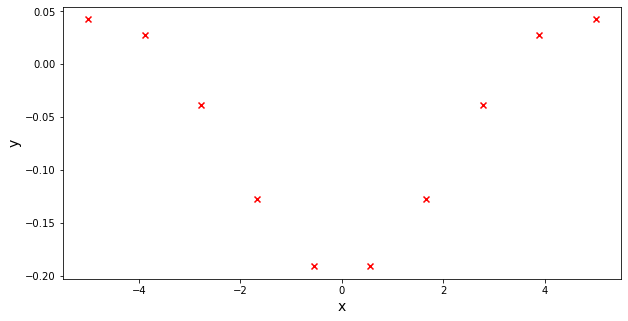

In [9]:
draw(setForInterp(n = 10))
write(setForInterp(n = 10))

1. 2) Реализована функция polynominalSet(), возвращающая набор данных, полученых при помощи интерполяции полиномом Лагранжа.
1. 3) Исходные данные были интерполированны, количество узлов исходных данных - 15, количество узлов полинома Лагранжа - 40. Результат интерполяции записан в текстовый файл.

<AxesSubplot:>

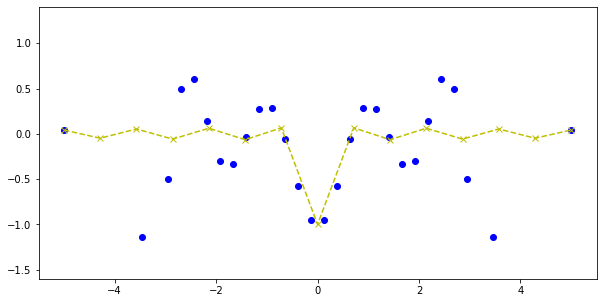

In [10]:
draw(setForInterp(n = 15), polynominalSet(setForInterp(n = 15), n = 40), drawtype = 'dataframes', \
     col1 = 'x', col2 = 'y', color = ['y','b'], linestyle = None, layers = [])

1. 4) Применение интерполяции полиномом Лагранжа с использованием набора данных, полученного с помощью полинома Чебышева.

<AxesSubplot:>

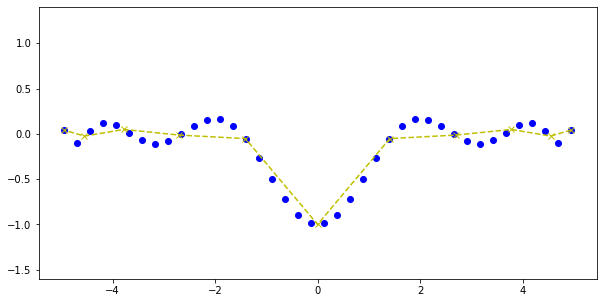

In [11]:
draw(setForInterp(chebyshev = True, n = 11), polynominalSet(setForInterp(chebyshev = True, n = 11), n = 40),\
     drawtype = 'dataframes', col1 = 'x', col2 = 'y', color = ['y','b'], linestyle = None, layers = [])

2. 1) Загружены данные, выведены первые 10 строк таблицы.

In [12]:
readDF(nRows = 10)

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,EURUSD,D,210201,0,1.21227,1.21365,1.20530,1.20677
1,EURUSD,D,210202,0,1.20677,1.20878,1.20100,1.20360
2,EURUSD,D,210203,0,1.20368,1.20502,1.20020,1.20410
3,EURUSD,D,210204,0,1.20413,1.20430,1.19560,1.19656
4,EURUSD,D,210205,0,1.19663,1.20500,1.19510,1.20476
5,EURUSD,D,210207,0,1.20460,1.20551,1.20327,1.20484
6,EURUSD,D,210208,0,1.20484,1.20660,1.20180,1.20510
7,EURUSD,D,210209,0,1.20522,1.21220,1.20480,1.21156
8,EURUSD,D,210210,0,1.21158,1.21441,1.21070,1.21191
9,EURUSD,D,210211,0,1.21179,1.21495,1.21110,1.21297


2. 1) Построен график цены закрытия.

<AxesSubplot:>

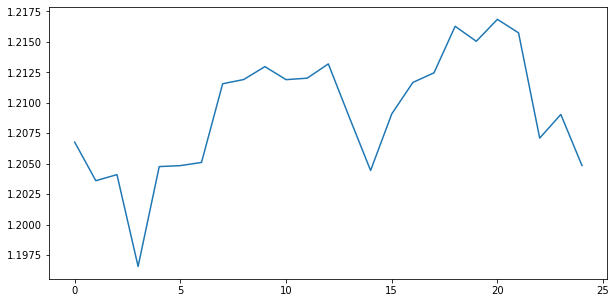

In [13]:
draw(readDF(), col2 = '<CLOSE>', drawtype = 'ExchangeRates')

2. 2) Построены модели полиноминальной регрессии по значениям столбца цены закрытия. Выполнен прогноз цены закрытия.

In [14]:
regr(readDF())[:5]

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,days,linear,quad,three,linearErr,quadErr,threeErr
0,EURUSD,D,210201,0,1.21227,1.21365,1.2053,1.20677,1.0,1.202304,1.202230,1.206703,0.515305,0.515383,0.826013
1,EURUSD,D,210202,0,1.20677,1.20878,1.2010,1.20360,2.0,1.203137,1.203097,1.203441,0.515305,0.515383,0.826013
2,EURUSD,D,210203,0,1.20368,1.20502,1.2002,1.20410,3.0,1.203970,1.203959,1.201894,0.515305,0.515383,0.826013
3,EURUSD,D,210204,0,1.20413,1.20430,1.1956,1.19656,4.0,1.204803,1.204815,1.201749,0.515305,0.515383,0.826013
4,EURUSD,D,210205,0,1.19663,1.20500,1.1951,1.20476,5.0,1.205636,1.205665,1.202693,0.515305,0.515383,0.826013


2. 3) Построены графики цены закрытия и значений регрессионных моделей. Указаны коэффициенты корелляции R^2.

n = 1, R^2 = 0.5153
n = 2, R^2 = 0.5154
n = 3, R^2 = 0.826


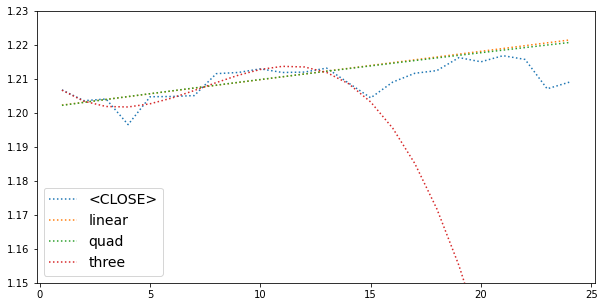

In [15]:
draw(regr(readDF()), drawtype = 'regr', col1 = 'days', linestyle = 'dotted', \
     layers = ['<CLOSE>', 'linear', 'quad', 'three'])
print('n = 1, R^2 = '+ str(round(float(regr(readDF())['linearErr'][0]), 4)))
print('n = 2, R^2 = '+ str(round(float(regr(readDF())['quadErr'][0]), 4)))
print('n = 3, R^2 = '+ str(round(float(regr(readDF())['threeErr'][0]), 4)))

2. 4) На основании полученного коэффициента корреляции R^2 = 0.826, можно сделать вывод о том, что модель регрессия степени n = 3 наилучшим образом аппроксимирует исходные данные, но, исходя из полученного графика, не является оптимальным решением в задаче долгосрочного прогнозирования. Модели регрессии n = 1 и n = 2, для которых характерны коэффициенты корреляции R^2 = 0.5153 и R^2 = 0.5154 соответственно, достаточным образом аппроксимируют исходные данные и позволяют получить более корректную трендовую составляющую, с помощью которой может быть осуществлено прогнозирование на более долгий срок в сравнении с трендовой составляющей модели регрессии n = 3.